## EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.base import TransformerMixin
from sklearn.compose import make_column_selector as selector
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [3]:
X = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')
X.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,NAME_CONTRACT_STATUS_Completed_prev,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Signed_prev,NAME_CONTRACT_STATUS_Sent proposal,NAME_CONTRACT_STATUS_Refused_credit,NAME_CONTRACT_STATUS_Approved_credit,SK_DPD_max,SK_DPD_DEF_max,DAY_DIFF,PAY_INSTALL_PROP
0,Cash loans,M,N,Y,0,135000.0,545040.0,17244.0,450000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.083333,1.342883
1,Cash loans,M,Y,N,1,225000.0,1288350.0,36922.5,1125000.0,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cash loans,F,N,N,1,157500.0,352044.0,17253.0,247500.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.750000,0.299998
3,Cash loans,M,N,Y,0,166500.0,621000.0,33817.5,621000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.545455,0.333333
4,Cash loans,F,Y,N,0,157500.0,808650.0,23773.5,675000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.333333,1.000000


In [4]:
df = X
df['TARGET'] = y
df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Signed_prev,NAME_CONTRACT_STATUS_Sent proposal,NAME_CONTRACT_STATUS_Refused_credit,NAME_CONTRACT_STATUS_Approved_credit,SK_DPD_max,SK_DPD_DEF_max,DAY_DIFF,PAY_INSTALL_PROP,TARGET
0,Cash loans,M,N,Y,0,135000.0,545040.0,17244.0,450000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.083333,1.342883,0
1,Cash loans,M,Y,N,1,225000.0,1288350.0,36922.5,1125000.0,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Cash loans,F,N,N,1,157500.0,352044.0,17253.0,247500.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.750000,0.299998,1
3,Cash loans,M,N,Y,0,166500.0,621000.0,33817.5,621000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.545455,0.333333,0
4,Cash loans,F,Y,N,0,157500.0,808650.0,23773.5,675000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.333333,1.000000,0


In [5]:
df.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Signed_prev,NAME_CONTRACT_STATUS_Sent proposal,NAME_CONTRACT_STATUS_Refused_credit,NAME_CONTRACT_STATUS_Approved_credit,SK_DPD_max,SK_DPD_DEF_max,DAY_DIFF,PAY_INSTALL_PROP,TARGET
count,80000.000000,8.000000e+04,8.000000e+04,79996.000000,7.993500e+04,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,75834.000000,75834.000000,75834.000000,75834.000000,75834.000000,75834.000000,75834.000000,75834.000000,7.583400e+04,80000.000000
mean,0.418825,1.697397e+05,5.978550e+05,27077.718492,5.374794e+05,0.020877,-16030.699975,64051.390450,-5007.796425,-3000.153825,...,0.000013,0.030646,0.001622,0.000013,0.000026,3.353324,0.120289,33.479237,inf,0.080263
std,0.726304,4.297981e+05,4.019382e+05,14494.643430,3.690639e+05,0.013847,4376.470870,141471.792596,3525.635483,1510.545519,...,0.003631,0.638469,0.040241,0.003631,0.005135,62.781130,1.566477,35.777217,NaN,0.271701
min,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000290,-25197.000000,-17912.000000,-24672.000000,-6551.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1069.404710,0.000000e+00,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16528.500000,2.385000e+05,0.010006,-19683.000000,-2759.000000,-7497.000000,-4305.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.571429,5.000000e-01,0.000000
50%,0.000000,1.485000e+05,5.120640e+05,24880.500000,4.500000e+05,0.018850,-15719.000000,-1212.000000,-4523.000000,-3265.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.888889,6.887195e-01,0.000000
75%,1.000000,2.025000e+05,8.086500e+05,34578.000000,6.795000e+05,0.028663,-12395.000000,-288.000000,-2040.000000,-1728.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.207785,1.000000e+00,0.000000
max,14.000000,1.170000e+08,4.050000e+06,230161.500000,4.050000e+06,0.072508,-7673.000000,365243.000000,0.000000,0.000000,...,1.000000,44.000000,1.000000,1.000000,1.000000,2407.000000,138.000000,1603.360684,inf,1.000000


In [6]:
df['TARGET'].value_counts()

0    73579
1     6421
Name: TARGET, dtype: int64

#### Target class is unbalanced

In [7]:
73579 / 6421

11.459118517364896

#### Income Type vs. Default Rate

Text(0, 0.5, 'Default Rate')

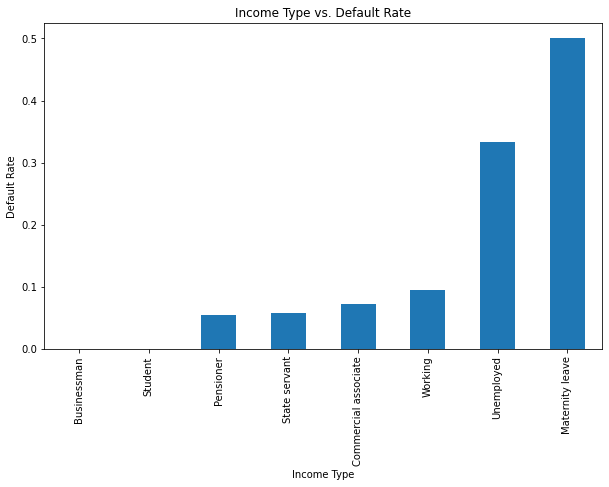

In [8]:
plt.figure(figsize=(10, 6))
df.groupby('NAME_INCOME_TYPE')['TARGET'].mean().sort_values().plot(kind='bar')
plt.title('Income Type vs. Default Rate')
plt.xlabel('Income Type')
plt.ylabel('Default Rate')

#### Education Type vs. Default Rate

Text(0, 0.5, 'Default Rate')

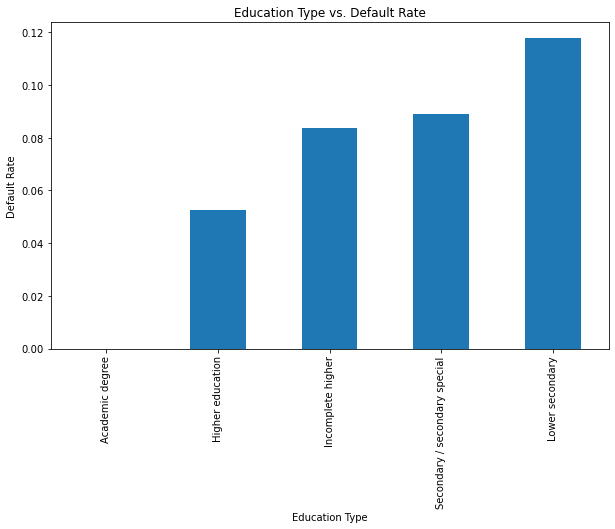

In [9]:
plt.figure(figsize=(10, 6))
df.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values().plot(kind='bar')
plt.title('Education Type vs. Default Rate')
plt.xlabel('Education Type')
plt.ylabel('Default Rate')

#### Occupation Type vs. Default Rate

Text(0, 0.5, 'Default Rate')

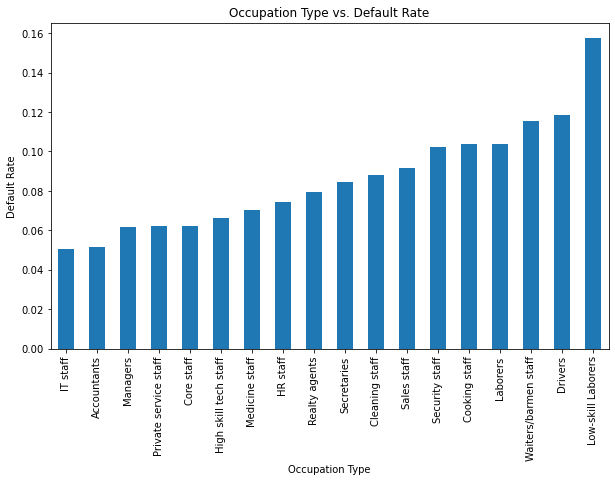

In [10]:
plt.figure(figsize=(10, 6))
df.groupby('OCCUPATION_TYPE')['TARGET'].mean().sort_values().plot(kind='bar')
plt.title('Occupation Type vs. Default Rate')
plt.xlabel('Occupation Type')
plt.ylabel('Default Rate')

#### Distribution of Ext_scource_3 with respect to Default Rate

<AxesSubplot:title={'center':'EXT_SOURCE_3'}, xlabel='TARGET'>

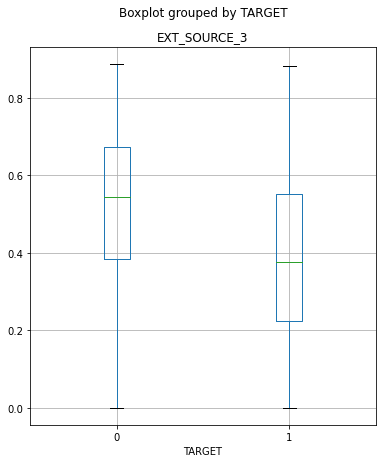

In [70]:
df.boxplot(column='EXT_SOURCE_3', by='TARGET', figsize=(6, 7))


In [13]:
df[fc]

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79996,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79997,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79998,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
flag_df = pd.DataFrame(df[fc].sum(), columns=[1])
flag_df[0] = df.shape[0] - df[fc].sum()
flag_df

,1,0
FLAG_DOCUMENT_2,6,79994
FLAG_DOCUMENT_3,56802,23198
FLAG_DOCUMENT_4,8,79992
FLAG_DOCUMENT_5,1180,78820
FLAG_DOCUMENT_6,7083,72917
FLAG_DOCUMENT_7,17,79983
FLAG_DOCUMENT_8,6575,73425
FLAG_DOCUMENT_9,315,79685
FLAG_DOCUMENT_10,1,79999
FLAG_DOCUMENT_11,311,79689


<AxesSubplot:title={'center':'Flag Documents vs. Number of Applicants Who Turned In'}>

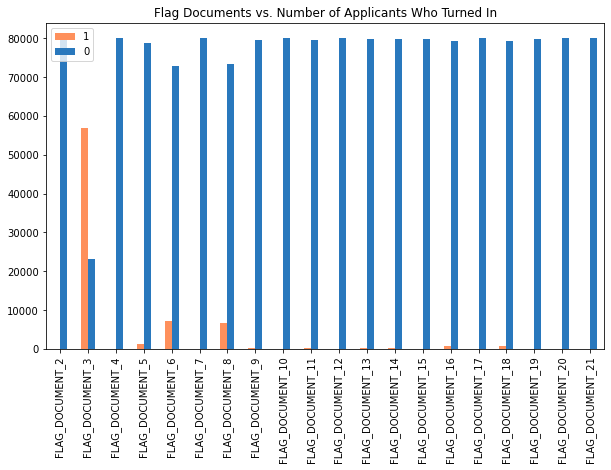

In [73]:
flag_df.plot(kind='bar', color=['#FE905C',"#2978BD"], figsize=(10, 6), 
             title='Flag Documents vs. Number of Applicants Who Turned In')

### Model 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.base import TransformerMixin
from sklearn.compose import make_column_selector as selector
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier

In [8]:
X_train = pd.read_csv('X_train_old.csv')
Final_X_test = pd.read_csv('X_test_old.csv')
y_train = pd.read_csv('y_train_old.csv')
Final_y_test = pd.read_csv('y_test_old.csv')
X_train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_curr,AMT_ANNUITY_app,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,NAME_CONTRACT_STATUS_Completed_credit_card,NAME_CONTRACT_STATUS_Demand_credit_card,NAME_CONTRACT_STATUS_Signed_credit_card,NAME_CONTRACT_STATUS_Sent proposal,NAME_CONTRACT_STATUS_Refused_credit_card,NAME_CONTRACT_STATUS_Approved,SK_DPD_credit_card,SK_DPD_DEF_credit_card,DAY_DIFF,PAY_INSTALL_PROP
0,Cash loans,M,N,Y,0,135000.0,545040.0,17244.0,450000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.083333,1.342883
1,Cash loans,M,Y,N,1,225000.0,1288350.0,36922.5,1125000.0,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cash loans,F,N,N,1,157500.0,352044.0,17253.0,247500.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.750000,1.799988
3,Cash loans,M,N,Y,0,166500.0,621000.0,33817.5,621000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.545455,1.000000
4,Cash loans,F,Y,N,0,157500.0,808650.0,23773.5,675000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.333333,1.000000


#### Forward Selection --> too slow

In [1]:
from sklearn.svm import LinearSVC
from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector

lasso = linear_model.Lasso(alpha=0.1)
selector = SequentialFeatureSelector(lasso, n_features_to_select=150)
selector.fit(X_train_encoded, y_train)
selector.get_support()

#### Univariate Feature Selection --> no improvement


In [2]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=250)
X_train_knn_250 = selector.fit_transform(X_train_knn, y_train)
X_train_knn_250

#### More Feature Engineering

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [10]:
# add features
def combine_cols(df):
    
    doc = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
    req = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
    
    df['num_doc'] = df[doc].sum(axis=1)
    df['total_req'] = df[req].sum(axis=1)
    df['total_req'] = df['total_req'].apply(lambda x: 0 if x == 0 else 1 if x <= 5 else 2)
    df['AMT_CREDIT_DEBT_RATE'] = df['AMT_CREDIT_SUM_DEBT_mean'] / (1 + df['AMT_CREDIT_SUM_mean'])
    return df

# one-hot categorical features
cat_encoder = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown="ignore"), selector(dtype_exclude=['float', 'int']))],
    remainder='passthrough')

# standardize numerical features
scaler = StandardScaler()


In [11]:
combine_cols(X_train)
combine_cols(X_test)
X_train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_curr,AMT_ANNUITY_app,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,NAME_CONTRACT_STATUS_Sent proposal,NAME_CONTRACT_STATUS_Refused_credit_card,NAME_CONTRACT_STATUS_Approved,SK_DPD_credit_card,SK_DPD_DEF_credit_card,DAY_DIFF,PAY_INSTALL_PROP,num_doc,total_req,AMT_CREDIT_DEBT_RATE
3822,Cash loans,F,N,Y,0,202500.0,808650.0,29709.0,675000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,16.047619,2.000000,1,1,0.630840
35562,Cash loans,F,N,N,2,90000.0,808650.0,26217.0,675000.0,Family,...,0.0,0.0,0.0,0.0,0.0,21.250000,2.000000,1,0,0.727847
4883,Cash loans,F,N,Y,1,130500.0,301464.0,23949.0,238500.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,18.300000,2.000000,1,1,0.551866
71170,Cash loans,F,Y,Y,0,180000.0,381528.0,14512.5,315000.0,Family,...,0.0,0.0,0.0,0.0,0.0,120.042857,5.645019,1,0,NaN
25665,Cash loans,F,N,Y,0,135000.0,619965.0,20128.5,517500.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,41.654545,4.491163,1,2,0.304094


In [12]:
# transform X_train
X_train_encoded = cat_encoder.fit_transform(X_train)
X_train_encoded = np.nan_to_num(X_train_encoded, posinf=0, neginf=0) # fillna with 0
X_train_encoded = scaler.fit_transform(X_train_encoded)
X_train_encoded

array([[ 3.22313549e-01, -3.22313549e-01,  7.15642655e-01, ...,
         1.97074856e-01,  3.72264661e-01,  4.54470078e-03],
       [ 3.22313549e-01, -3.22313549e-01,  7.15642655e-01, ...,
         1.97074856e-01, -1.34956365e+00,  5.44274784e-03],
       [ 3.22313549e-01, -3.22313549e-01,  7.15642655e-01, ...,
         1.97074856e-01,  3.72264661e-01,  3.81360433e-03],
       ...,
       [ 3.22313549e-01, -3.22313549e-01,  7.15642655e-01, ...,
         1.97074856e-01,  3.72264661e-01,  5.18312822e-03],
       [ 3.22313549e-01, -3.22313549e-01,  7.15642655e-01, ...,
         1.97074856e-01, -1.34956365e+00, -1.29530640e-03],
       [ 3.22313549e-01, -3.22313549e-01,  7.15642655e-01, ...,
         1.97074856e-01,  3.72264661e-01,  9.34659984e-04]])

In [13]:
# transform X_test
X_test_encoded = cat_encoder.transform(X_test)
X_test_encoded = np.nan_to_num(X_test_encoded, posinf=0, neginf=0) # fillna with 0
X_test_encoded = scaler.transform(X_test_encoded)
X_test_encoded

array([[ 3.22313549e-01, -3.22313549e-01,  7.15642655e-01, ...,
         1.97074856e-01,  3.72264661e-01, -1.29530640e-03],
       [ 3.22313549e-01, -3.22313549e-01, -1.39734544e+00, ...,
         3.10324785e+00, -1.34956365e+00, -6.89843592e-04],
       [ 3.22313549e-01, -3.22313549e-01, -1.39734544e+00, ...,
         1.97074856e-01,  3.72264661e-01,  5.35800456e-03],
       ...,
       [ 3.22313549e-01, -3.22313549e-01,  7.15642655e-01, ...,
         1.97074856e-01,  3.72264661e-01, -1.29530640e-03],
       [-3.10256892e+00,  3.10256892e+00, -1.39734544e+00, ...,
         1.97074856e-01, -1.34956365e+00, -1.29530640e-03],
       [ 3.22313549e-01, -3.22313549e-01,  7.15642655e-01, ...,
         1.97074856e-01,  3.72264661e-01,  4.92893751e-03]])

#### Grid Search

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 5, 8],
    'learning_rate': [0.1, 0.3, 0.5],
    'n_estimators': [300, 500, 700],
    'subsample': [0.3, 0.5],
    'colsample_bytree': [0.5, 0.8],
    'reg_alpha': [0.1, 0.3, 0.5],
}

xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid, cv=4, verbose=10)
grid_search.fit(X_train_knn, y_train, sample_weight=xgb_weight)

print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

**Best hyperparameters:** {'max_depth': 2, 'n_estimators': 500, 'reg_alpha': 5, 'subsample': 0.8}

In [18]:
xgb_weight = [1 if i==0 else 11 for i in y_train['TARGET']]
xgbc = XGBClassifier(max_depth=2, n_estimators=500, reg_alpha=5, subsample=0.8)
xgbc.fit(X_train_encoded, y_train['TARGET'],sample_weight=xgb_weight)
y_pred = xgbc.predict(X_test_encoded)
roc_auc_score(Final_y_test, y_pred)

0.6961842816421723
